In [1]:
import pandas as pd

# Load the dataset (replace 'path_to_dataset.csv' with the actual path to your dataset file)
dataset = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')

# Display the first few rows of the dataset
print(dataset.head())


   transact  onServiceConnected  bindService  attachInterface  \
0         0                   0            0                0   
1         0                   0            0                0   
2         0                   0            0                0   
3         0                   0            0                0   
4         0                   0            0                0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                  0                  0         1   
1                  0                  0         1   
2                  0                  0         1   
3                  0                  0         0   
4                  0                  0         0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3             

C:\Users\varnav\AppData\Local\Temp\ipykernel_23612\2590555592.py:4: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')


In [6]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', low_memory=False)

# Display the first few rows of the dataset
print(dataset.head())
# Display data types
print(dataset.dtypes)

# Assume 'class' is the target column, convert it to binary
dataset['class'] = dataset['class'].map({'S': 1, 'B': 0})

# Handle mixed type column 'TelephonyManager.getSimCountryIso'
# Replace '?' with NaN
dataset['TelephonyManager.getSimCountryIso'].replace('?', pd.NA, inplace=True)

# Convert 'TelephonyManager.getSimCountryIso' to numeric
dataset['TelephonyManager.getSimCountryIso'] = pd.to_numeric(dataset['TelephonyManager.getSimCountryIso'], errors='coerce')

# Drop rows with NA values
dataset.dropna(inplace=True)

# Ensure all feature columns are numeric
feature_columns = dataset.columns.drop('class')
X = dataset[feature_columns].copy()  # Make a copy to avoid SettingWithCopyWarning
y = dataset['class']

# Ensure all feature columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaN values with 0 (or another strategy)
X.fillna(0, inplace=True)


   transact  onServiceConnected  bindService  attachInterface  \
0         0                   0            0                0   
1         0                   0            0                0   
2         0                   0            0                0   
3         0                   0            0                0   
4         0                   0            0                0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                  0                  0         1   
1                  0                  0         1   
2                  0                  0         1   
3                  0                  0         0   
4                  0                  0         0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3             

C:\Users\varnav\AppData\Local\Temp\ipykernel_23612\3316289988.py:4: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')


   transact  onServiceConnected  bindService  attachInterface  \
0         0                   0            0                0   
1         0                   0            0                0   
2         0                   0            0                0   
3         0                   0            0                0   
4         0                   0            0                0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                  0                  0         1   
1                  0                  0         1   
2                  0                  0         1   
3                  0                  0         0   
4                  0                  0         0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3             

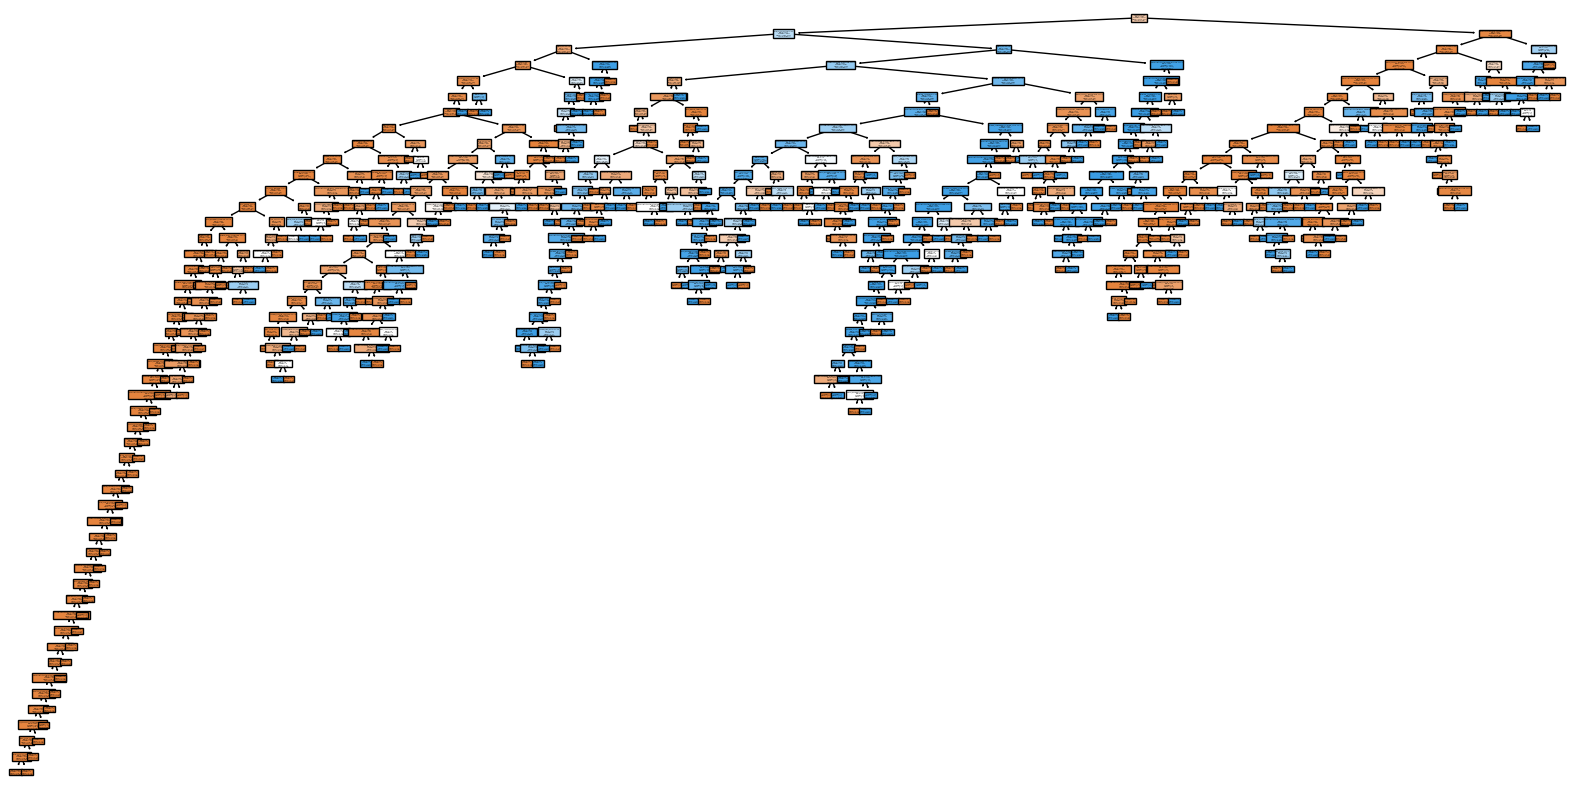

Accuracy: 0.9750664893617021
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1863
           1       0.97      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.97      0.97      0.97      3008
weighted avg       0.98      0.98      0.98      3008



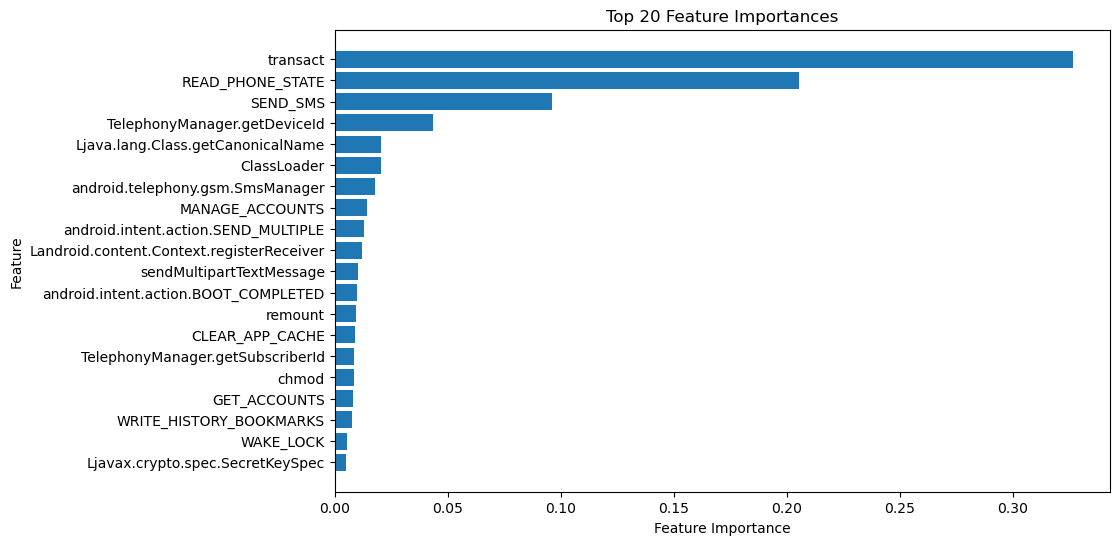

In [20]:
import pandas as pd

# Load the dataset (replace 'path_to_dataset.csv' with the actual path to your dataset file)
dataset = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')

# Display the first few rows of the dataset
print(dataset.head())

# Display data types
print(dataset.dtypes)



# Identify columns with object data types
object_columns = dataset.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)

# Check unique values in object columns to see what needs to be handled
for col in object_columns:
    print(f"Unique values in {col}: {dataset[col].unique()}")

# Convert the `class` column to binary
dataset['class'] = dataset['class'].map({'S': 1, 'B': 0})

# Replace '?' with NaN in 'TelephonyManager.getSimCountryIso'
dataset['TelephonyManager.getSimCountryIso'].replace('?', pd.NA, inplace=True)

# Convert 'TelephonyManager.getSimCountryIso' to numeric, coercing errors
dataset['TelephonyManager.getSimCountryIso'] = pd.to_numeric(dataset['TelephonyManager.getSimCountryIso'], errors='coerce')

# Fill NaN values with 0 or another strategy
dataset.fillna(0, inplace=True)

# Ensure all feature columns are numeric
feature_columns = dataset.columns.drop('class')
X = dataset[feature_columns]
y = dataset['class']

print(X.dtypes)  # Check to confirm all features are numeric
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Benign', 'Malware'], filled=True)
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'feature': feature_columns, 'importance': feature_importances})
features_df = features_df.sort_values(by='importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(features_df['feature'][:20], features_df['importance'][:20])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()



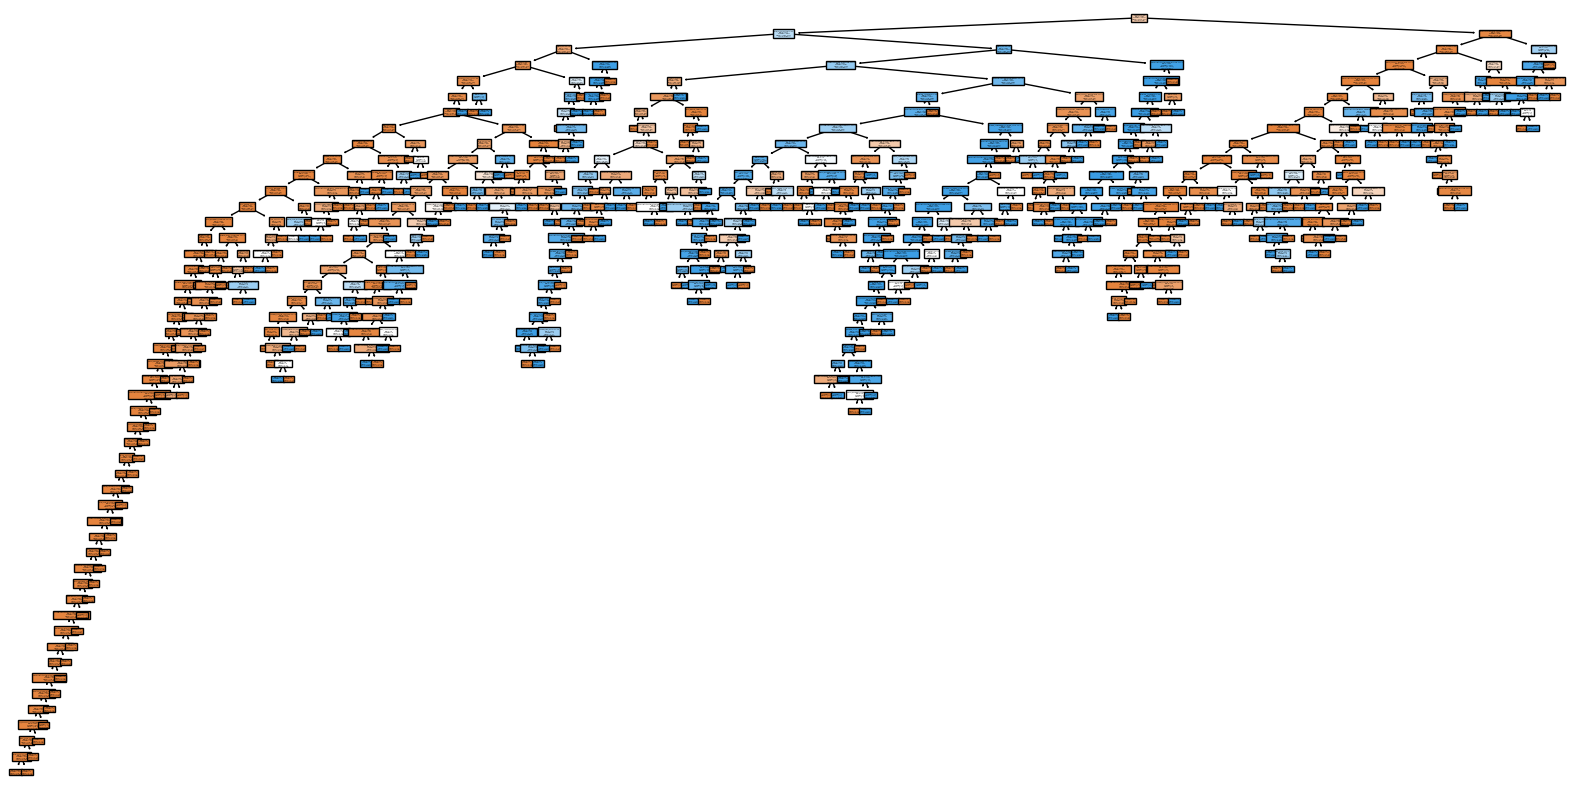

Accuracy: 0.9750664893617021
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1863
           1       0.97      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.97      0.97      0.97      3008
weighted avg       0.98      0.98      0.98      3008



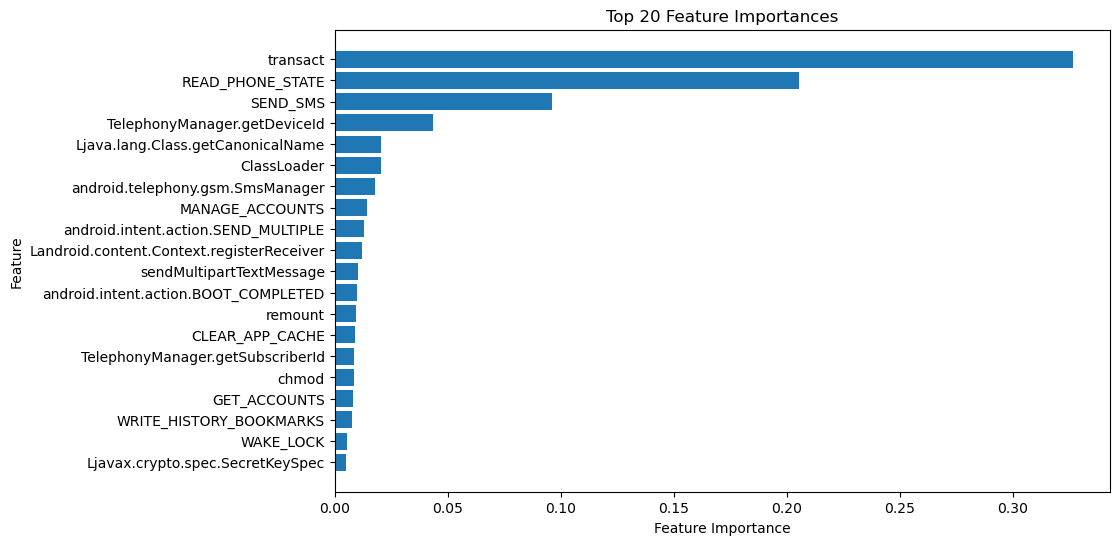

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Benign', 'Malware'], filled=True)
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'feature': feature_columns, 'importance': feature_importances})
features_df = features_df.sort_values(by='importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(features_df['feature'][:20], features_df['importance'][:20])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


       transact  onServiceConnected  bindService  attachInterface  \
13309         0                   0            0                0   
12832         1                   1            1                1   
6393          0                   0            0                0   
4990          1                   1            1                1   
12460         1                   1            1                1   

       ServiceConnection  android.os.Binder  SEND_SMS  \
13309                  0                  0         0   
12832                  1                  1         0   
6393                   0                  1         0   
4990                   1                  1         0   
12460                  1                  1         0   

       Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
13309                                  0                            0   
12832                                  1                            0   
6393                   

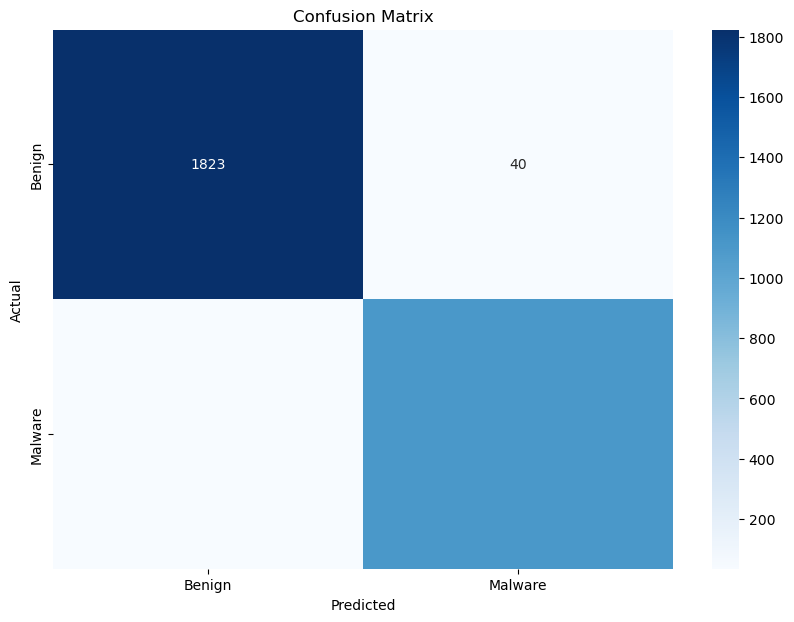

In [16]:
# Combine X_test with the predictions to show the detection results
detection_results = X_test.copy()
detection_results['Actual_Class'] = y_test
detection_results['Predicted_Class'] = y_pred

# Add a column to show if the prediction was correct
detection_results['Correct_Prediction'] = detection_results['Actual_Class'] == detection_results['Predicted_Class']

# Display the detection results
print(detection_results.head())

# Optionally, you can save the results to a CSV file
detection_results.to_csv('detection_results.csv', index=False)

# Output the detection summary
print("Detection Summary:")
print(f"Total samples: {len(detection_results)}")
print(f"Correctly predicted: {detection_results['Correct_Prediction'].sum()}")
print(f"Incorrectly predicted: {len(detection_results) - detection_results['Correct_Prediction'].sum()}")
print(f"Malware detected: {detection_results[detection_results['Predicted_Class'] == 1].shape[0]}")
print(f"Benign detected: {detection_results[detection_results['Predicted_Class'] == 0].shape[0]}")
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['Benign', 'Malware'], discretize_continuous=True)

# Select a sample instance for explanation
sample_index = 0  # Change this index as needed
instance = X_test.iloc[sample_index]

# Explain the prediction made by the model for the selected instance
explanation = explainer.explain_instance(instance.values, model.predict_proba, num_features=len(X.columns))

# Display the explanation
explanation.show_in_notebook(show_table=True)



D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
